# 7 - Crosscheck

This notebook is just a render of Eduard's trackster to facilitate a visual comparison of our results.

In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm

In [2]:
import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [3]:
filename = "tracksters_ds.root"
file = uproot.open(filename)
tracksters = file["tracksters/complete"]
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_E = tracksters['vertices_energy'].array()

In [4]:
edges = fn.edgeBuilderNNTr(
    vertices_indexes, 
    vertices_x, 
    vertices_y, 
    vertices_z, 
    vertices_E
)

<IPython.core.display.Javascript object>


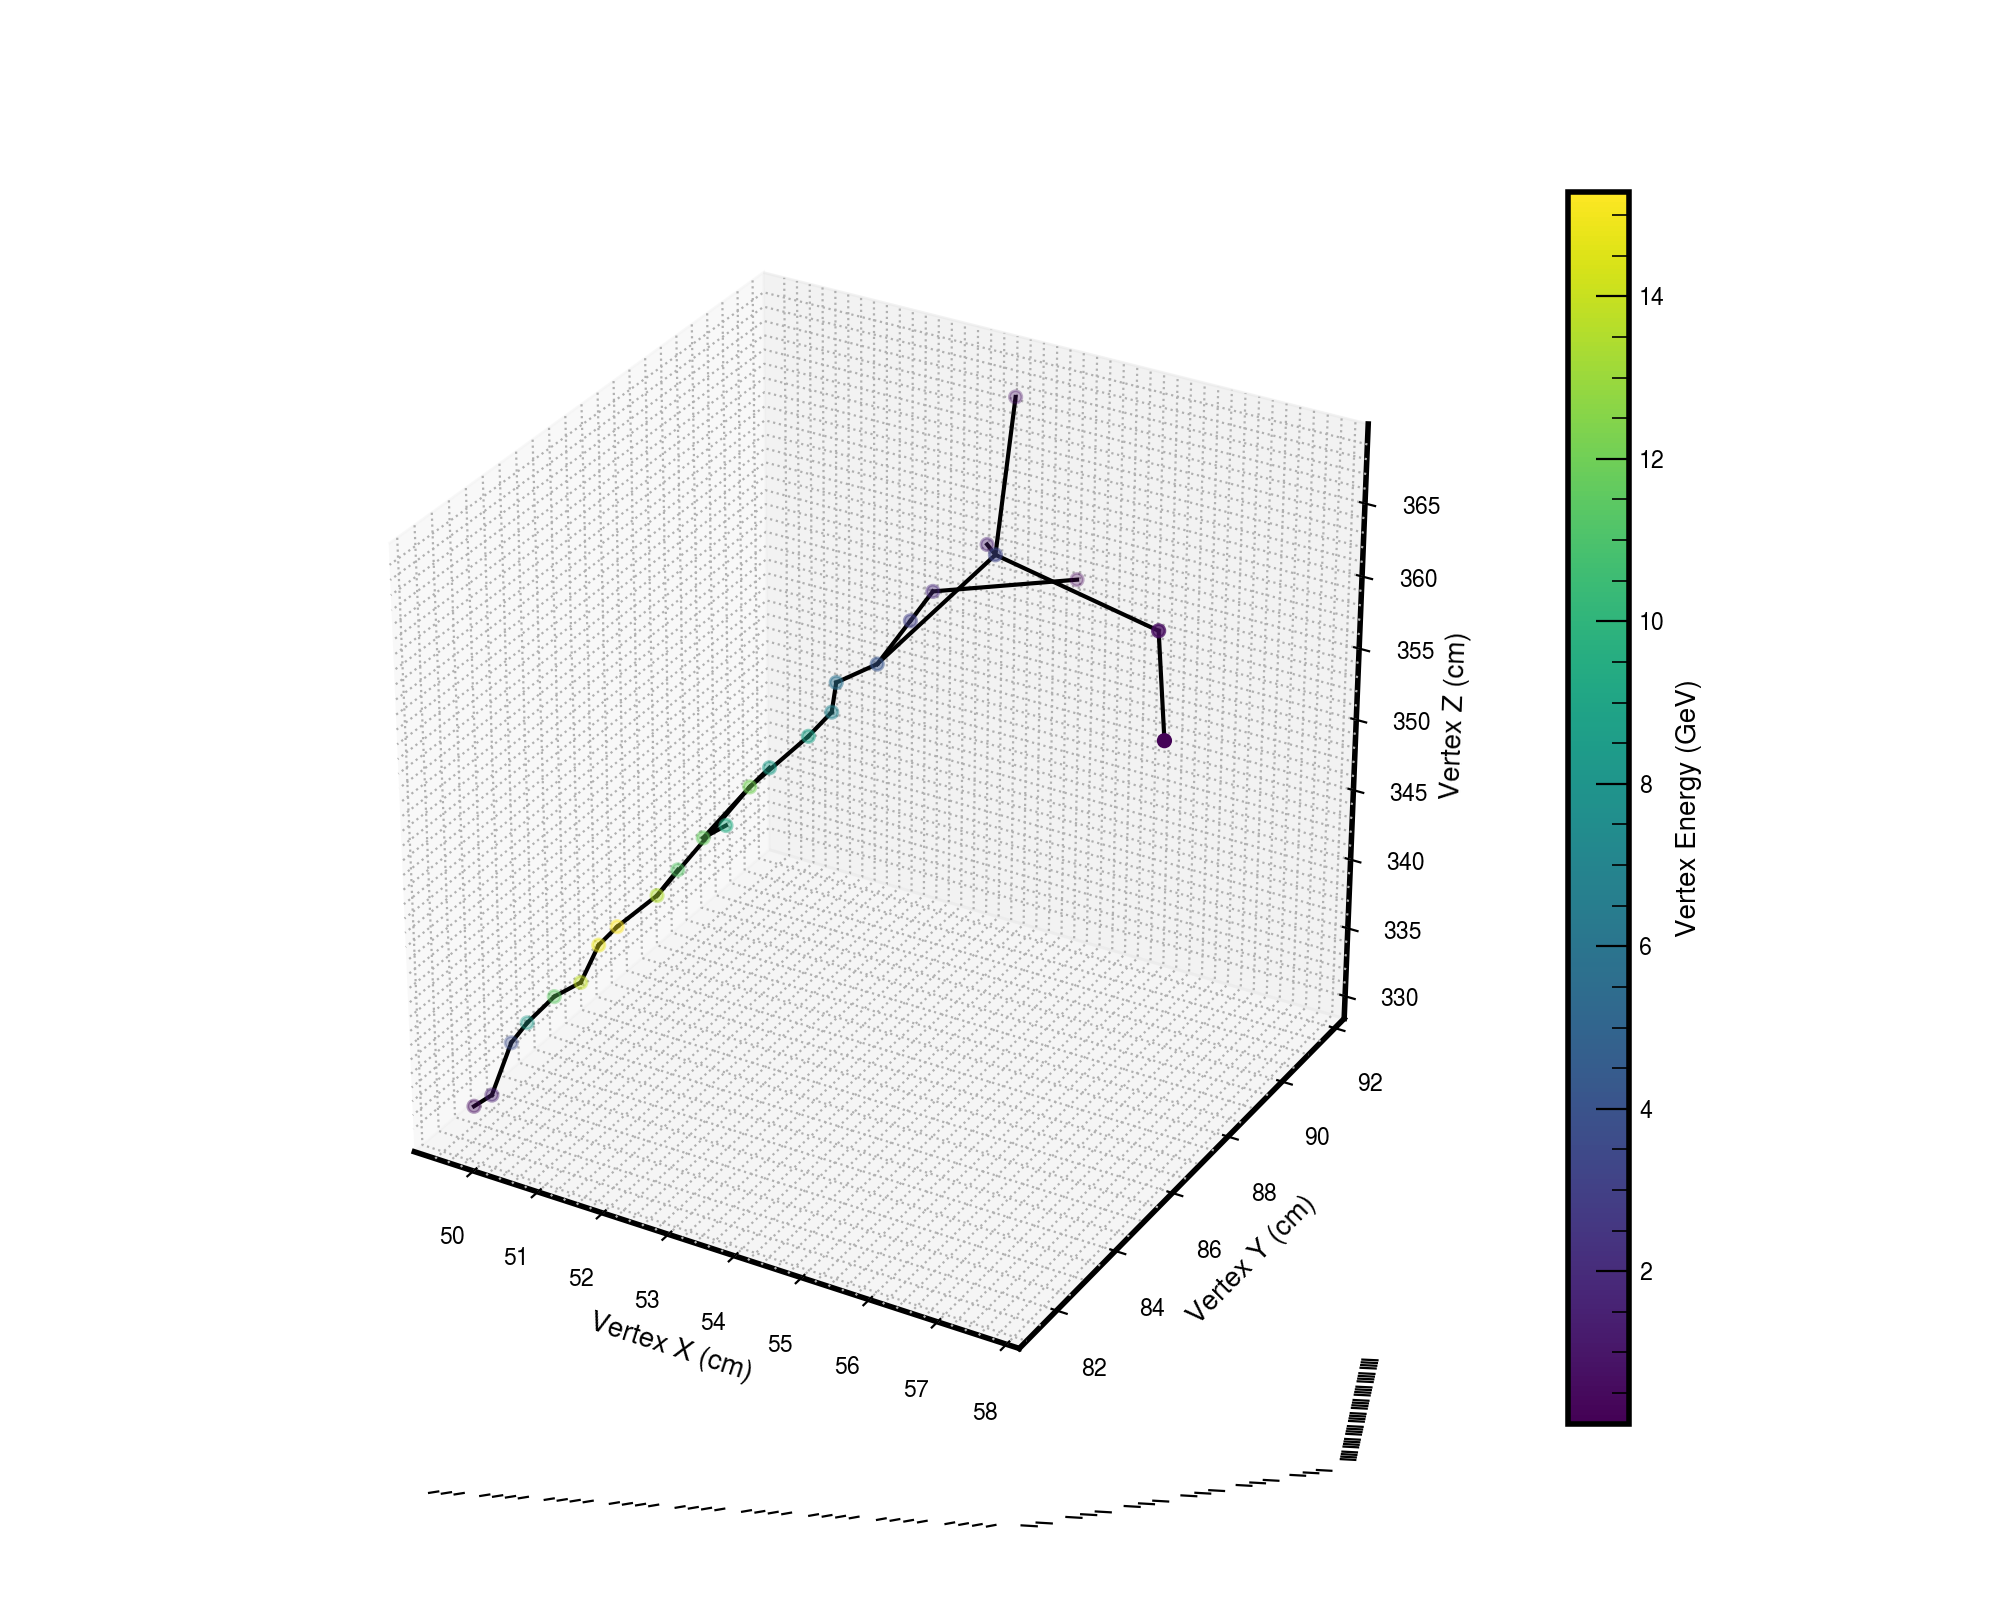

In [5]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Vertex X (cm)')
ax.set_ylabel('Vertex Y (cm)')
ax.set_zlabel('Vertex Z (cm)')
colmap = cm.ScalarMappable(cmap=cm.viridis)    

evt = 3

colmap.set_array(vertices_E[evt])
yg = ax.scatter(
    vertices_x[evt], 
    vertices_y[evt], 
    vertices_z[evt], 
    c=cm.viridis(vertices_E[evt]/max(vertices_E[evt])), 
    marker='o'
)
cb = fig.colorbar(colmap,label='Vertex Energy (GeV)')

for ied in edges[evt]:
    idx0 = ak.where(vertices_indexes[evt] == ied.to_list()[0])[0][0]
    idx1 = ak.where(vertices_indexes[evt] == ied.to_list()[1])[0][0]
    ax.plot(
        [vertices_x[evt, idx0] ,vertices_x[evt, idx1]],
        [vertices_y[evt, idx0] ,vertices_y[evt, idx1]],
        [vertices_z[evt, idx0] ,vertices_z[evt, idx1]],
        'black'
    )
plt.show()